# Изучение рынка заведений общественного питания города Москва

- Автор:Осипов Руслан
- Дата: 10.04.2025

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ провести исследовательский анализ рынка общественного притания города Москва.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
   - категории заведений;
   - административные районы Москвы;
   - соотношение сетевых и несетевых заведений;
   - количество посадочных мест в заведениях;
   - рейтинг заведений;
   - кореляция данных с рейтингом завдений;
   - топ-15 популярных сетей в Москве;
   - средний чек(столбец `middle_avg_bill`) в районах Москвы.
4. Сформулировать итоговый вывод и рекомендации.

### Описание данных

Для анализа доступны данные с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух дадасетов:

- `/datasets/rest_info.csv` - содержит информацию о заведениях общественного питания;
- `/datasets/rest_price.csv` - содержит информацию о среднем чеке в заведениях общественного питания.


### Описание датасета rest_info

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
   - 0 — *заведение не является сетевым;*
   - 1 — *заведение является сетевым.*
- `seats` — количество посадочных мест.

### Описание датасета rest_price

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
  - *«Средний счёт: 1000–1500 ₽»;*
  - *«Цена чашки капучино: 130–220 ₽»;*
  - *«Цена бокала пива: 400–600 ₽».*
  - и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
  - *Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.*
  - *Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.*
  - *Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.*
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  - *Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.*
  - *Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.*
  - *Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.*



### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
!pip install phik -U

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные bank_df и clients_df
rest_info = pd.read_csv('https://code.s3.yandex.net//datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [4]:
# Выводим первые строки датафрейма на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Теперь познакомимся с данными датасета `rest_price.csv` — выведем первые строки методом head(), а информацию о датафрейме методом `info()`:

In [6]:
# Выводим первые строки датафрейма на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых содержит информацию о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия стобцов находятся в корректном виде snake case. 
- Столбцы `id`, `name`, `category`, `address`, `district`, `hours` содержат текстовые данные `object`. Для оптимизации анализа столбцы `category`, `district` надо привезти к типу данных `category`.
- Столбцы `rating`, `chain`, `seats` содержат числовые данныее `float64` и `int64`. Для оптимизации анализа колонку `seats` можно привезти к целочисленному типу данных, а по данным в колонке `chain` понизить разрядность.
- Прпопуски сожержатся в столбцах `hours`, `seats`. Ппопуски в часах работы могут говорить о том, что заведение работает 24 часа без выходных или ыграл человечский фактор и данные просто не были заполнены, Пропуски в в колонке с числом посадочных мест не удивительно, это говорит о том. что посадочных мест в заведении нет. Данные пропуски необходимо заполнить значениями-индитткаторами.

Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых содержит информацию о среднем чеке в заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия стобцов находятся в корректном виде snake case. 
- Столбцы `id`, `price`, `avg_bill` содержат текстовые данные `object`. Для оптимизации анализа столбец `price` надо привезти к типу данных `category`, а пропуски заполнить значением-индикатором `неизвестно`.
- Столбцы `middle_avg_bill `, `middle_coffee_cup ` содержат числовые данныее `float64`. 
- Прпопуски сожержатся в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` содержат пропуски. В зависимости от объема пропущенных данных в предобработке данных выберем метод их устранения.

Первичное знакомство с данными показывает, что данные неплохого качества. Пропущенные данные имеются, но в большинстве случаев, судя по условиям заполнения этих данных, это нормально. данные пропуски устраним на следующем этапе предобработки данных. 

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один.

In [8]:
# Соединяем данные в единый датафрейм df
df = rest_info.merge(rest_price, on='id', how='left')

In [9]:
# Выводим первые строки датафрейма на экран
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [10]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и информация обо всех пользователях сохранилась.

## 2. Предобработка данных

### Корректность типов данных и их преобразование.

In [11]:
# Проверим типы данных в датафрейме df с помощью атрибута dtypes
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [12]:
# Преобразуем столбцы 'category', 'district' и 'price' в тип category
df['category'] = df['category'].astype('category')
df['district'] = df['district'].astype('category')
df['price'] = df['price'].astype('category')

In [13]:
# Преобразуем 'seats' в целочисленный тип данных
df['seats'] = pd.to_numeric(df['seats'], errors='coerce').astype('Int64')

In [14]:
# Преобразуем 'chain' в тип int8
df['chain'] = df['chain'].astype('int8')

In [15]:
# Проверим результат преобразования типов данных
df.dtypes

id                     object
name                   object
category             category
address                object
district             category
hours                  object
rating                float64
chain                    int8
seats                   Int64
price                category
avg_bill               object
middle_avg_bill       float64
middle_coffee_cup     float64
dtype: object

Данные в общем датасете приведены к корректному типу.

### Наличие пропусков в данных

In [16]:
# Выводим количество пропущенных строк в датасете
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [17]:
# Подсчитываем процент строк с пропусками
df.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

- `hours`: в  536 строках(6,37 % данных) отсутствует информация по времени работы заведения. 

- `seats`: в 3611 строках(43% данных) есть пропуски.

- `price`: в 5091 строке(60 % данных) пропущены данные. 

- `avg_bill`: в 4590 строках(54,6 % данных) данные отсуствуют.

- `middle_avg_bill`: в 5257(62,5 % данных) есть пропуски. Это большое количество.

- `middle_coffee_cup`: в 7871 строке(93,6 % данных) отсутствует информация. 

Данные пропуски убирать не будем, так как их устранение может привезти к некорректному анализу данных. Можем приступать к следующему этапу, устранению явных и неявных дубликатов.

### Явные и неявные дубликаты

#### Поиск неявных дубликатов

In [18]:
# Проверяем данные  в name на наличие неявных дубликатов
print(df['name'].unique())

['WoWфли' 'Четыре комнаты' 'Хазри' ... 'Миславнес' 'Самовар' 'Kebab Time']


In [19]:
# Приводим name к нижнему регистру и убираем лишние пробелы
df['name'] = df['name'].str.strip().str.lower()

In [20]:
# Проверяем результат
print(df['name'].unique())

['wowфли' 'четыре комнаты' 'хазри' ... 'миславнес' 'самовар' 'kebab time']


In [21]:
#  Приводим address к нижнему регистру и убираем лишние пробелы
df['address'] = df['address'].str.strip().str.lower()

In [22]:
# Проверяем результат
print(df['address'].unique())

['москва, улица дыбенко, 7/1' 'москва, улица дыбенко, 36, корп. 1'
 'москва, клязьминская улица, 15' ...
 'москва, улица лобачевского, 52, корп. 1'
 'москва, болотниковская улица, 52, корп. 2'
 'москва, чонгарский бульвар, 26а, корп. 1']


In [23]:
# Ищем неявные дубликаты в комбинациях значений name и address
dupl_name_adr = df.duplicated(subset=['name', 'address'], keep='first')
dupl_sum = dupl_name_adr.sum()
print(dupl_sum)

4


In [24]:
# Удаляем дубликаты в комбинациях name и address
df.drop_duplicates(subset=['name', 'address'], keep='first', inplace=True)

In [25]:
# Проверяем данные  в category на наличие неявных дубликатов
print(df['category'].unique())

['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']
Categories (8, object): ['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']


In [26]:
# Проверяем данные  в price на наличие неявных дубликатов
print(df['price'].unique())

[NaN, 'выше среднего', 'средние', 'высокие', 'низкие']
Categories (4, object): ['выше среднего', 'средние', 'высокие', 'низкие']


In [27]:
# Проверяем данные  в district на наличие неявных дубликатов
district_counts = df['district'].value_counts()
print(district_counts)
print(district_counts.sum())

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64
8402


In [28]:
# Проверяем данные  в hours на наличие неявных дубликатов
hours_counts = df['hours'].value_counts()
print(hours_counts)
print(hours_counts.sum())

ежедневно, 10:00–22:00                                               758
ежедневно, круглосуточно                                             730
ежедневно, 11:00–23:00                                               396
ежедневно, 10:00–23:00                                               310
ежедневно, 12:00–00:00                                               254
                                                                    ... 
пн-пт 08:00–22:00; сб 08:00–19:00                                      1
пн-пт 08:30–20:30; сб,вс 10:00–21:00                                   1
пн-чт 08:00–22:00; пт 08:00–23:00; сб 09:00–23:00; вс 10:00–22:00      1
пн-ср 15:00–00:00; чт-сб 15:00–05:00; вс 13:00–05:00                   1
пн-чт 08:30–21:00; пт 08:30–22:00; сб,вс 09:00–21:00                   1
Name: hours, Length: 1306, dtype: int64
7867


In [29]:
# Проверяем резултат.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8402 non-null   object  
 1   name               8402 non-null   object  
 2   category           8402 non-null   category
 3   address            8402 non-null   object  
 4   district           8402 non-null   category
 5   hours              7867 non-null   object  
 6   rating             8402 non-null   float64 
 7   chain              8402 non-null   int8    
 8   seats              4792 non-null   Int64   
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
dtypes: Int64(1), category(3), float64(3), int8(1), object(5)
memory usage: 698.3+ KB


Неявные дубликаты(4) были найдены в комбинациях значений в столбцах name и address. Неявные дубликаты были удалены.

#### Поиск явных дубликатов

In [30]:
# Ищем количество явных дубликатов
df.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [31]:
# Количество удаленных строк
delet_str = 8406 - len(df)
delet_str_prc = (delet_str / 8406) * 100

print(f'Абсолютное количество удаленных строк: {delet_str}')
print(f'Отсносительное количество удаленных строк: {delet_str_prc:.2f}%')

Абсолютное количество удаленных строк: 4
Отсносительное количество удаленных строк: 0.05%


Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [32]:
# Добавляем в дадасет новый столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7

is_24_7_values = []

for value in df['hours']:
    if value == 'ежедневно, круглосуточно':
       is_24_7_values.append(True)
    else:
        is_24_7_values.append(False)
        
df['is_24_7'] = is_24_7_values

# Проверяем результат
all_count = df['is_24_7'].sum()
print("Количество заведений, работающих круглосуточно (True):", all_count)
df.info()


Количество заведений, работающих круглосуточно (True): 730
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8402 non-null   object  
 1   name               8402 non-null   object  
 2   category           8402 non-null   category
 3   address            8402 non-null   object  
 4   district           8402 non-null   category
 5   hours              7867 non-null   object  
 6   rating             8402 non-null   float64 
 7   chain              8402 non-null   int8    
 8   seats              4792 non-null   Int64   
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
 13  is_24_7            8402 non-null   bool    
dtypes: Int64(1), bool(1), category(3), float64(3)

Новый столбец `is_24_7` успешно добавлен.

---

### Промежуточный вывод

Исходный объеденнный дадасет содержал 8406 строк  и 13 столбцов. После прохождения всех этапов предобработки, устранения пропусков и дубликатов, осталось 8402 строки. Так же был добавлен дополнительный столбец `is_24_7`, значение `True` котрого указывает на то, что заведение работает круглосуточно. Количество столбцов в преобработанном датасете - 14. Абсолютное количество удаленных строк равно 4, что является 0,05 % от исходного объема данных.

Пропуски присутствовали в столбцах `hours`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Незначительное количество пропусков(6,37 % данных) в столбце `hours` были заполнены значением-индикатором `неизвестно`. В остальных столбцах пропуски были заполнены значениями-индикаторами, `price`, `avg_bill` - значением `неизвестно`, `middle_avg_bill`, `middle_coffee_cup` - значением `-1`.

In [33]:
# Выводим первые строки датафрейма на экран и информацию о нем
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8402 non-null   object  
 1   name               8402 non-null   object  
 2   category           8402 non-null   category
 3   address            8402 non-null   object  
 4   district           8402 non-null   category
 5   hours              7867 non-null   object  
 6   rating             8402 non-null   float64 
 7   chain              8402 non-null   int8    
 8   seats              4792 non-null   Int64   
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
 13  is_24_7            8402 non-null   bool    
dtypes: Int64(1), bool(1), category(3), float64(3), int8(1), object(5)
memory usage: 706.6+ KB


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False


Все столбцы были приведены к корректному типу данных.

## 3. Исследовательский анализ данных


---

### Задача 1

Исследуем количество объектов общественного питания по каждой категории. Результат сопроводим подходящей визуализацией.

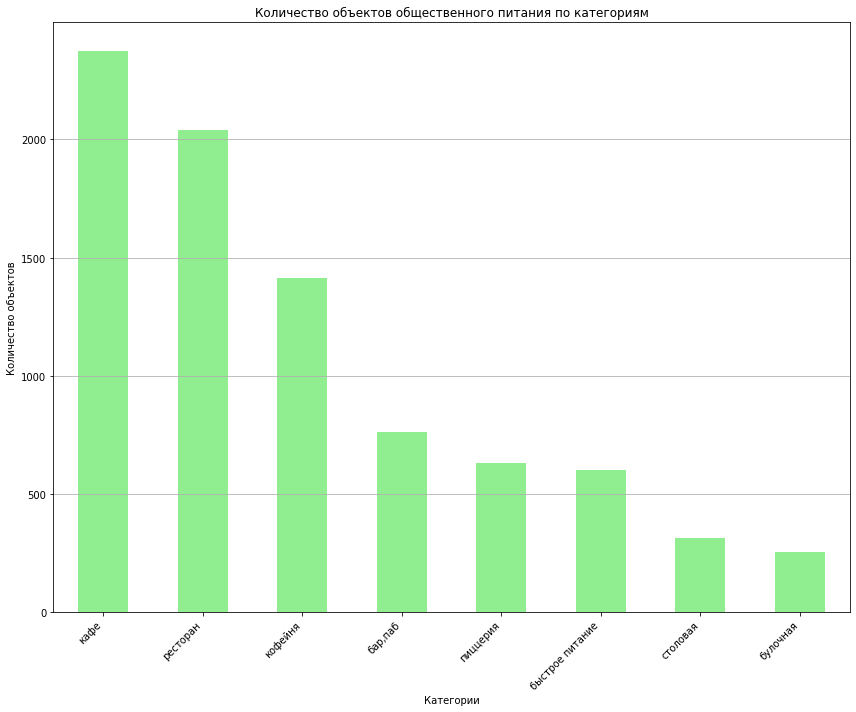

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64


In [34]:
# Для данной задачи лучше всего подходит столбчатая диаграмма.Создадим ее.

category_counts = df['category'].value_counts()
plt.figure(figsize=(12, 10))
category_counts.plot(kind='bar', color='lightgreen')
plt.title('Количество объектов общественного питания по категориям')
plt.xlabel('Категории')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print(category_counts)

Как показывает диаграмма c сильным отрывом лидируют категории `кафе`, `ресторан` и `кофейня`. Данные категории общественного питания занимают более половины рынка по заведениям общепита.

---

### Задача 2

#### Распределение количества заведений по административным районам Москвы.

Исследуем распределение количества заведений по административным районам Москвы.

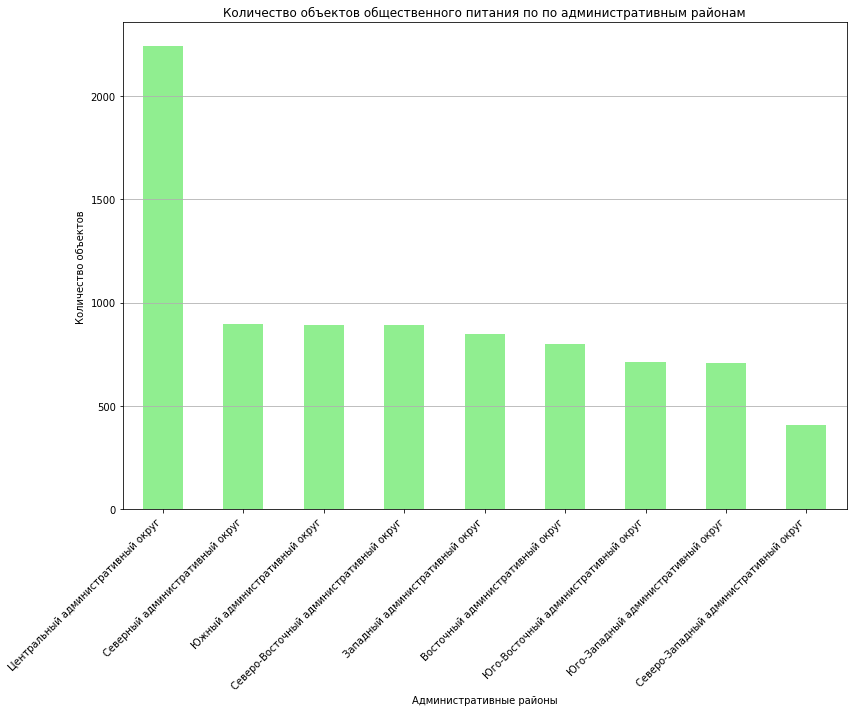

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64


In [35]:
# Для данной задачи лучше всего подходит столбчатая диаграмма.Создадим ее.

district_counts = df['district'].value_counts()
plt.figure(figsize=(12, 10))
district_counts.plot(kind='bar', color='lightgreen')
plt.title('Количество объектов общественного питания по по административным районам')
plt.xlabel('Административные районы')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print(district_counts)

По диаграмме, что ЦАО находится в сильном отрыве от остальных. Следом идут САО и СВАО. Самое меньшее количество завдений общепита нахолится в с Северо-Западном административном округе

#### Распределение заведений каждой категории в Центральном административном округе Москвы.

Исследуем распределение заведений каждой категории в Центральном административном округе Москвы.

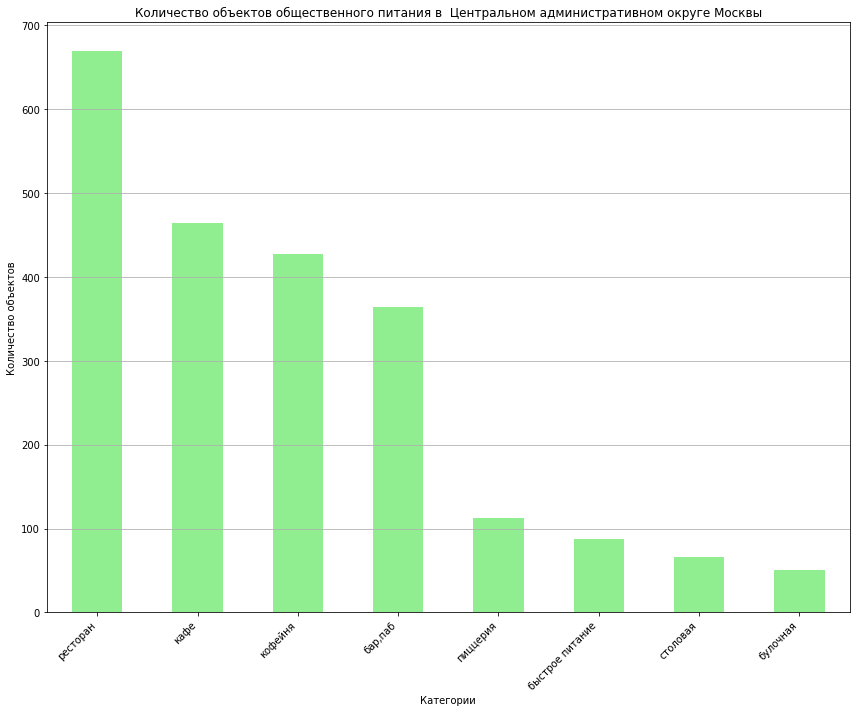

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64


In [36]:
# Для данной задачи так же лучше всего подходит столбчатая диаграмма.

centr_district = df[df['district'] == 'Центральный административный округ']
category_counts = centr_district['category'].value_counts()
plt.figure(figsize=(12, 10))
category_counts.plot(kind='bar', color='lightgreen')
plt.title('Количество объектов общественного питания в  Центральном административном округе Москвы')
plt.xlabel('Категории')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print(category_counts)

Тройка лидеров по категориям наблюдается и на уровне отельно взятого округа. Категории с самым большим количеством заведений это - рестораны, кафе и кофейни.

---

### Задача 3

#### Cоотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

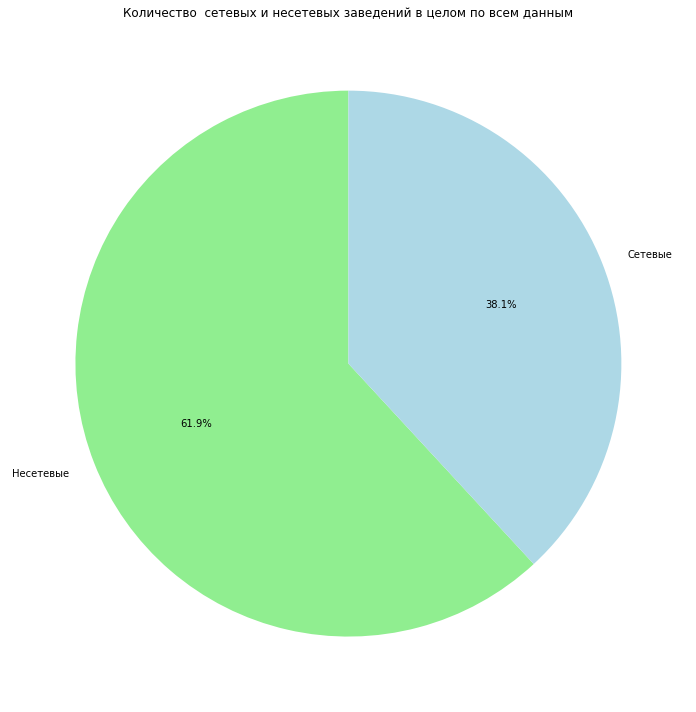

Количество несетевых заведений: 5199
Количество сетевых заведений: 3203
Доля несетевых заведений: 61.88%
Доля сетевых заведений: 38.12%


In [37]:
# Для этого построим столбцатую диаграмму по количеству несетевых и сетевых заведений, а так же посчитаем их долю

no_chain_count = (df['chain']==0).sum()
total_chain_count = df['chain'].count()
ye_chain_count = (df['chain']==1).sum()
no_chain_share = no_chain_count/total_chain_count
ye_chain_share = ye_chain_count/total_chain_count
chain_counts = df['chain'].value_counts()
chain_data = pd.Series([no_chain_count, ye_chain_count], index=['Несетевые', 'Сетевые'])
plt.figure(figsize=(12, 10))
chain_data.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue'], startangle=90)
plt.title('Количество  сетевых и несетевых заведений в целом по всем данным')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Вывод долей
print(f'Количество несетевых заведений: {no_chain_count}')
print(f'Количество сетевых заведений: {ye_chain_count}')
print(f'Доля несетевых заведений: {no_chain_share:.2%}')
print(f'Доля сетевых заведений: {ye_chain_share:.2%}')

Как видно по диаграмме количество несетвых заведений значительно больше, чем сетевых. Доля несетевых заведений от общего количества: 61.88%, доля сетевых заведений: 38.12%

#### Категории в несетевых заведениях

Исследуем какую долю занимают категории заведений в несетевых от общего числа заведений в категориях.

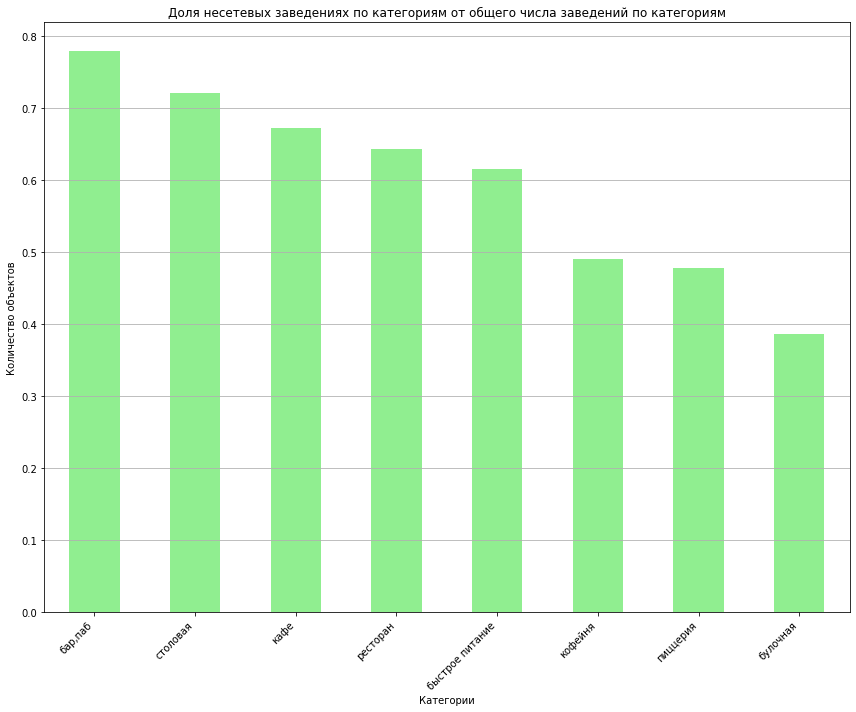

Доли несетевых заведений по категориям:
бар,паб            0.78
столовая           0.72
кафе               0.67
ресторан           0.64
быстрое питание    0.62
кофейня            0.49
пиццерия           0.48
булочная           0.39
Name: category, dtype: float64


In [38]:
# Построим диагарамму с долей несетевых заведений по категориям от общего числа заведений по категориям 
no_chain = df[df['chain'] == 0]
category_counts = no_chain['category'].value_counts()
total_category_counts = df['category'].value_counts()
share_category_counts = category_counts / total_category_counts
share_category_counts = share_category_counts.sort_values(ascending=False)
plt.figure(figsize=(12, 10))
share_category_counts.plot(kind='bar', color='lightgreen')
plt.title('Доля несетевых заведениях по категориям от общего числа заведений по категориям')
plt.xlabel('Категории')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print("Доли несетевых заведений по категориям:")
print(round(share_category_counts, 2))

Судя по диаграмме с точки зрения распределния долей по категориям несетевых завдений, лидирующие позиции занимают бары(0,78), столовые(0,72) и кафе(0,67). Самыми меньшими долями обладают булочные(0,39), пиццерии(0,48) и кофейни(0,49).  

#### Категории в сетевых заведениях

Исследуем какие категории заведений чаще являются сетевыми.

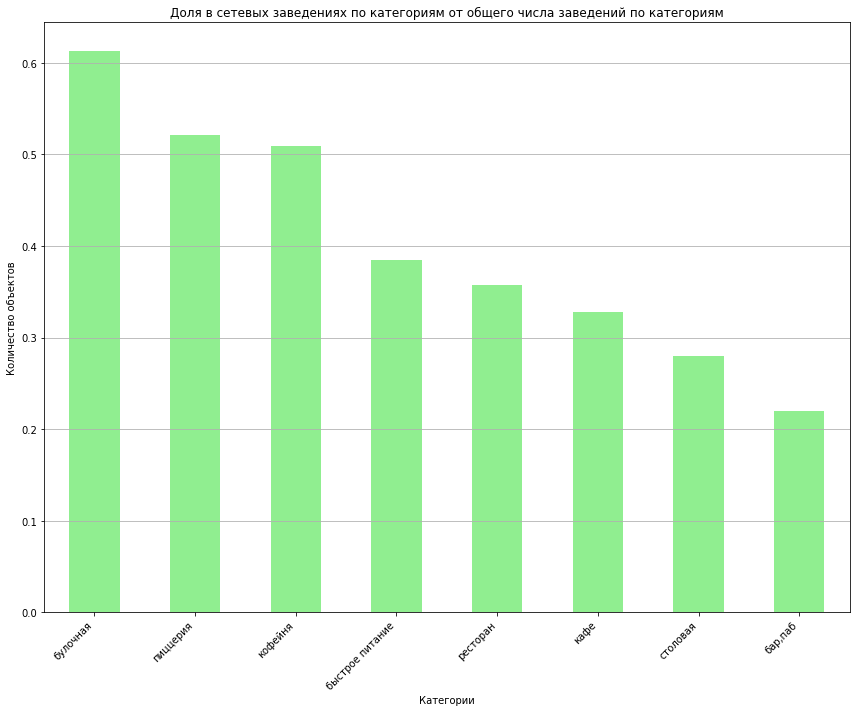

Доли сетевых заведений по категориям:
булочная           0.61
пиццерия           0.52
кофейня            0.51
быстрое питание    0.38
ресторан           0.36
кафе               0.33
столовая           0.28
бар,паб            0.22
Name: category, dtype: float64


In [39]:
# Построим диагарамму с долей сетевых заведений по категориям от общего числа заведений по категориям 
ya_chain = df[df['chain'] == 1]
category_counts = ya_chain['category'].value_counts()
total_category_counts = df['category'].value_counts()
share_category_counts = category_counts / total_category_counts
share_category_counts = share_category_counts.sort_values(ascending=False)
plt.figure(figsize=(12, 10))
share_category_counts.plot(kind='bar', color='lightgreen')
plt.title('Доля в сетевых заведениях по категориям от общего числа заведений по категориям')
plt.xlabel('Категории')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print("Доли сетевых заведений по категориям:")
print(round(share_category_counts, 2))

В сетевых заведениях наблюдается абсолютно проивоположная картина. доли больше всего у булочных(0,61), пиццерий(0,52) и кофеен(0,51). И меньше всего у баров(0,22), столовых(0,28) и кафе(0,33)

---

### Задача 4

#### Исследование количества посадочных мест в заведениях. 

Исследуем количество посадочных мест в заведениях. 


In [40]:
# Изучим статистические показатели столбца seats
print('Статистические показатели столбца seats:')
df['seats'].describe()

Статистические показатели столбца seats:


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Макссимальное количество посдочных мест, 1288, значительно превышает среднее значение, 94, которое не совпадает с медианой. Стандартное отклонение 91,54 имеет высокое значение, что указывает на большой разброс данных. 

#### Аномальные значения или выбросы в столбце `seats`

Проверим разброс данных ипостроим гистограмму распределения значений и диаграмму размаха для столбца seats.

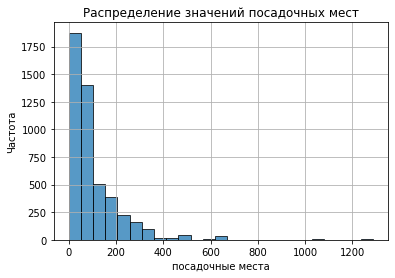

In [41]:
df['seats'].plot(
                kind='hist',
                bins=25, 
                alpha=0.75,
                edgecolor='black',
                rot=0,
)
plt.title('Распределение значений посадочных мест')
plt.xlabel('посадочные места')
plt.ylabel('Частота')
plt.grid()
plt.show()

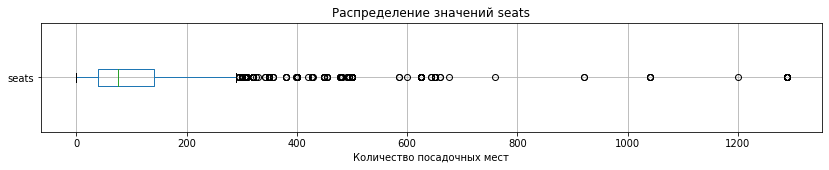

In [42]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 2))
df.boxplot(column='seats', vert=False)
plt.title('Распределение значений seats')
plt.xlabel('Количество посадочных мест')
plt.show()

Большое количество значений сконцентрировано на левой стороне графика и меньше 200. Чаще всего встречаются значения меньше 100. По гистограмме видно что большое количество заведений имеет небольшое количество посадочных мест. Есть несколько очень больших значений больше 500. Это явно говорит о выбросах. Хоть фудкорты и банкетные залы могут иметь такие показатели, но для корректного анализа выбросы лучше убрать.

#### Типичное количество посадочных мест для каждой категории заведений.

Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест, а именно среднее значение.

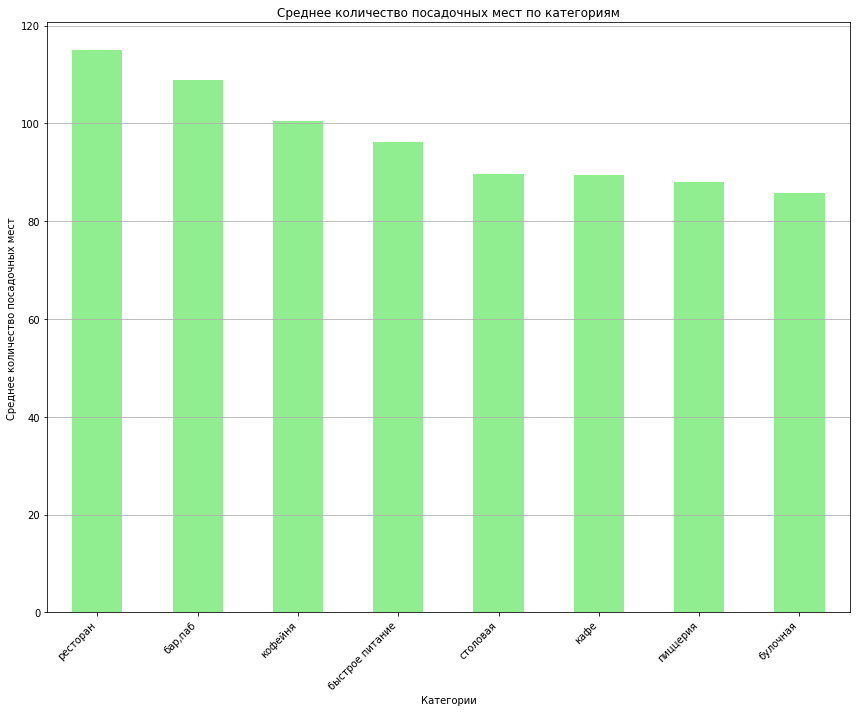

Среднее количество посадочных мест по категориям:
category
ресторан           114.90
бар,паб            108.95
кофейня            100.43
быстрое питание     96.19
столовая            89.72
кафе                89.42
пиццерия            87.91
булочная            85.74
Name: seats, dtype: float64


In [43]:
# Фильтрация данных: оставляем только заведения с seats <= 500
filtr_seats = df[(df['seats'] <= 500) & (df['seats'].notna())]
mean_seats = filtr_seats.groupby('category')['seats'].mean().sort_values(ascending=False)
mean_seats = mean_seats.astype(float)
plt.figure(figsize=(12, 10))
mean_seats.plot(kind='bar', color='lightgreen')

plt.title('Среднее количество посадочных мест по категориям')
plt.xlabel('Категории')
plt.ylabel('Среднее количество посадочных мест')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print('Среднее количество посадочных мест по категориям:')
print(round(mean_seats, 2))


По количеству посадочных мест лидируют рестораны(114,9), бары(108,95) и кофейни(100,43). Меньше всего в среднем посдочных мест в булочных(85,74).

---

### Задача 5

#### Исследование рейтинга заведений.

Исследуем рейтинги завдений общественного питания.

In [44]:
# Изучим статистические показатели столбца rating
print('Статистические показатели столбца rating:')
df['rating'].describe()

Статистические показатели столбца rating:


count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

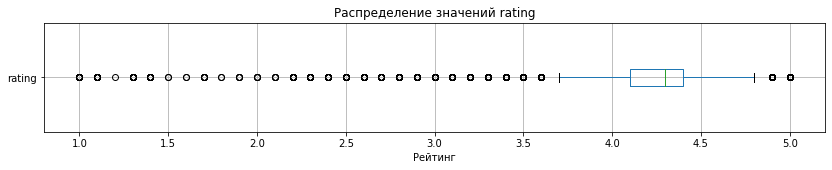

In [45]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 2))
df.boxplot(column='rating', vert=False)
plt.title('Распределение значений rating')
plt.xlabel('Рейтинг')
plt.show()

Судя по статичтическим показателям с данными в столбце rating все в порядке. Среднее значение 4,24 совападает с медианой 4,30. Максимальное значение 5,00 так же в норме. Встречаются значение ниже певого квартиля,но не ниже значения 1,00, это скорее всего это связано с тем, что в выборке есть заведения с низким рейтингом.

#### Средний рейтинг по категориям заведений.

Проведем исследование среднего рейтирнга в разрезе категорий заведений.

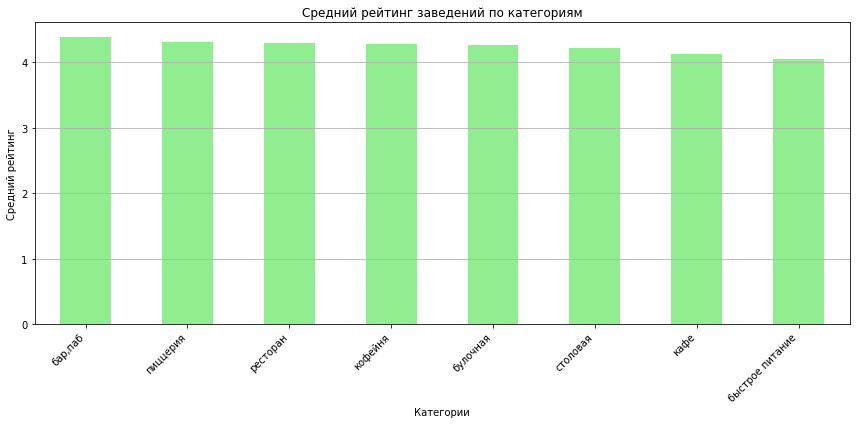

category
бар,паб            4.39
пиццерия           4.30
ресторан           4.29
кофейня            4.28
булочная           4.27
столовая           4.21
кафе               4.12
быстрое питание    4.05
Name: rating, dtype: float64


In [46]:
# Фильтрация данных: оставляем только заведения с seats <= 500
mean_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
mean_rating.plot(kind='bar', color='lightgreen')

plt.title('Средний рейтинг заведений по категориям')
plt.xlabel('Категории')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print(mean_rating.round(2))

Большое количество категорий общепита обладает средним рейтингом выше 4,00. Самое высокое значение среднего рейтинга у баров(4,39), самое низкое у быстрого питания(4,05).

---

### Задача 6  Корреляция рейтингов заведений

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений.  Выберите самую сильную связь и проверьте её.

Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным.

In [47]:
# Матрица корреляции работает только с числовыми данными.
# Поэтому добавим 3 новых столбца в датасет.

# Новый столбец category_number будет числовым отражением категориальных данных столбца сategory
category_number = []

for value in df['category']:
    if value == 'кафе':
        category_number.append(1)
    elif value == 'ресторан':
        category_number.append(2)
    elif value == 'кофейня':
        category_number.append(3)
    elif value == 'пиццерия':
        category_number.append(4)
    elif value == 'бар,паб':
        category_number.append(5)
    elif value == 'быстрое питание':
        category_number.append(6)
    elif value == 'булочная':
        category_number.append(7)
    elif value == 'столовая':
        category_number.append(8)
    else:
        category_number.append(0)
df['category_number'] = category_number    

# Новый столбец district_number будет числовым отражением категориальных данных столбца district
district_number = []

for value in df['district']:
    if value == 'Центральный административный округ':
        district_number.append(1)
    elif value == 'Северный административный округ':
        district_number.append(2)
    elif value == 'Северо-Восточный административный округ':
        district_number.append(3)
    elif value == 'Южный административный округ':
        district_number.append(4)
    elif value == 'Западный административный округ':
        district_number.append(5)
    elif value == 'Восточный административный округ':
        district_number.append(6)
    elif value == 'Юго-Западный административный округ':
        district_number.append(7)
    elif value == 'Юго-Восточный административный округ':
        district_number.append(8)
    elif value == 'Северо-Западный административный округ':
        district_number.append(9)
    else:
        district_number.append(0)

df['district_number'] = district_number

# Новый столбец price_number будет числовым отражением категориальных данных столбца price
price_number = []

for value in df['price']:
    if value == 'низкие':
        price_number.append(1)
    elif value == 'средние':
        price_number.append(2)
    elif value == 'выше среднего':
        price_number.append(3)
    elif value == 'высокие':
        price_number.append(4)
    elif value == 'неизвестно':
        price_number.append(-1)
    else:
        price_number.append(0)

df['price_number'] = price_number

# Проверяем результат
print(df.head())


                                 id                  name  category  \
0  0c3e3439a8c64ea5bf6ecd6ca6ae19f0                wowфли      кафе   
1  045780ada3474c57a2112e505d74b633        четыре комнаты  ресторан   
2  1070b6b59144425896c65889347fcff6                 хазри      кафе   
3  03ac7cd772104f65b58b349dc59f03ee  dormouse coffee shop   кофейня   
4  a163aada139c4c7f87b0b1c0b466a50f             иль марко  пиццерия   

                               address                         district  \
0           москва, улица дыбенко, 7/1  Северный административный округ   
1   москва, улица дыбенко, 36, корп. 1  Северный административный округ   
2       москва, клязьминская улица, 15  Северный административный округ   
3  москва, улица маршала федоренко, 12  Северный административный округ   
4      москва, правобережная улица, 1б  Северный административный округ   

                                               hours  rating  chain  seats  \
0                             ежедневно, 10:

In [48]:
# Отфильтруем данные в столбце price_number, чтобы в корреляцию не попали данные с заглушкой "неизвестно"
df_filtr = df[(df['price_number'] != -1)]
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df_filtr[['rating', 'chain', 'seats', 'is_24_7',
                         'category_number', 'district_number', 'price_number']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats', 'category_number', 'district_number', 'price_number']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price_number,0.281253
district_number,0.200761
category_number,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


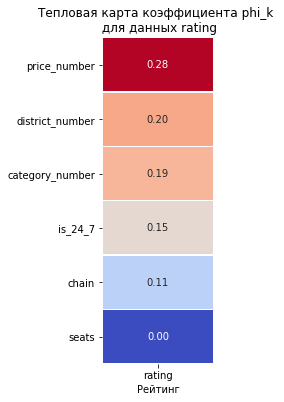

In [49]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False)
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')
plt.show()

По тепловой карте видно, что самая сильная корреляция у рейтинга наблюдается с ценой. 

Проверим это утверждение и построим сводную таблицу с группировкой по ценым категориям и убыванием рейтинга

In [50]:
# Создадим сводную таблицу с группировкой по ценовым категориям и найдем их средний рейтинг
avg_rating_table = pd.pivot_table(df_filtr,
    index=['price'], 
    values='rating',
    aggfunc={'rating': 'mean'}).reset_index()
avg_rating_table.columns = ['price','avg_rating']
sorted_rating = avg_rating_table.sort_values(by='avg_rating', ascending=False)
print(sorted_rating)

           price  avg_rating
0        высокие    4.436611
1  выше среднего    4.386348
3        средние    4.297874
2         низкие    4.173077


Как видно по сводной таблице в десятке категорий общепита с самым выскоми рейтингом преобладают ценовые категории как высокие и выше среднего. В заведениях с низким рейтингом ситауция другая - преобладает низкие цены. Возможно такая корреляция связано с тем, что в в заведениях с высокими ценами, больше внимания уделяется меню, обстановке и сервису, отсюда и объясняются высокие рейтинги. 

---

### Задача 7

#### Топ-15 популярных сетей в Москве

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе.

Топ-15 сетей по кличеству заведений:
                                     name  category  count  avg_rating
5836                          шоколадница   кофейня    119    4.178151
2685                       домино'с пицца  пиццерия     76    4.169737
2653                           додо пицца  пиццерия     74    4.286486
1172                     one price coffee   кофейня     71    4.064789
5942                         яндекс лавка  ресторан     69    3.872464
468                                 cofix   кофейня     65    4.075385
1350                                prime  ресторан     49    4.114286
3276                             кофепорт   кофейня     42    4.147619
3347  кулинарная лавка братьев караваевых      кафе     39    4.394872
5030                              теремок  ресторан     36    4.105556
316                              cofefest   кофейня     31    3.977419
5467                              чайхана      кафе     26    3.946154
2137                              буханк

Text(0.5, 0, 'Средний рейтинг')

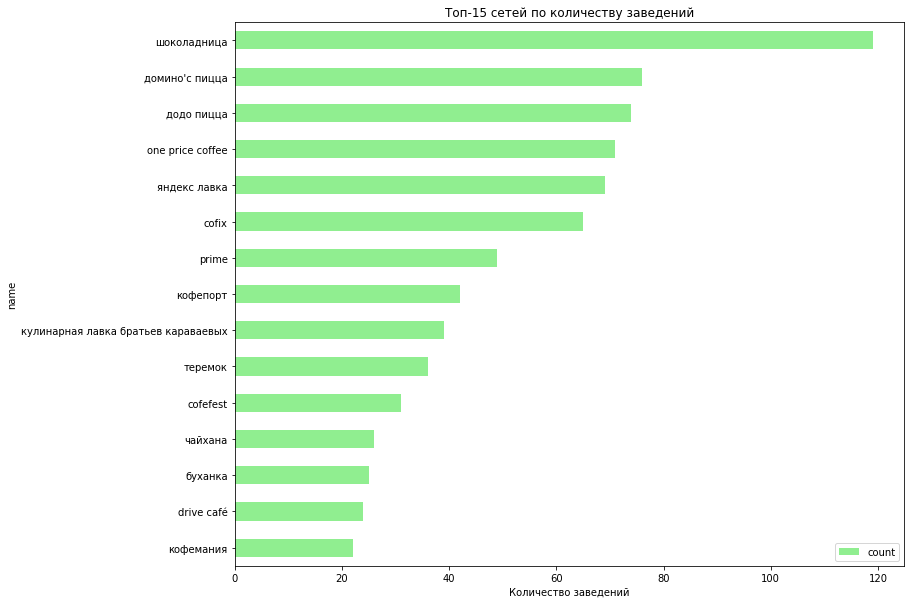

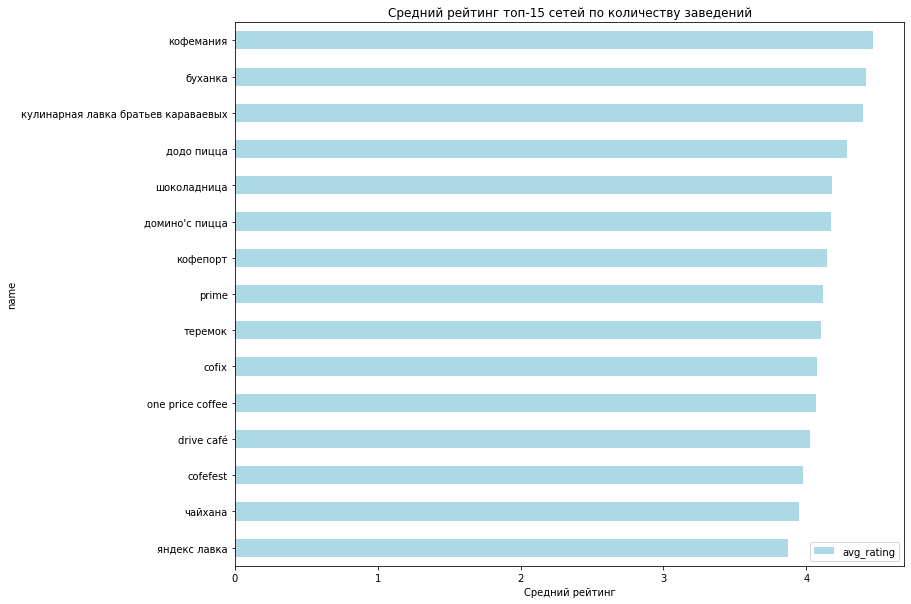

In [51]:
# Отфильтруем значение по столбцу chain, чтобы выделить сетевые завдеения
# Построим сводную таблицу с name, category c количеством заведений и средним рейтингом
df_chain = df[(df['chain'] == 1)]
chain_sales = pd.pivot_table(df_chain,
    index=['name', 'category'], 
    values='rating',
    aggfunc={'rating': ['count', 'mean']}).reset_index()
chain_sales.columns = ['name', 'category', 'count', 'avg_rating']

top_15_chains = chain_sales.sort_values(by='count', ascending=False).head(15)
print('Топ-15 сетей по кличеству заведений:')
print(top_15_chains)


top_15_chains.sort_values('count').plot(
    kind='barh', 
    x='name',
    y='count',
    color='lightgreen', 
    figsize=(12, 10))
plt.title('Топ-15 сетей по количеству заведений')
plt.xlabel('Количество заведений')

top_15_chains.sort_values('avg_rating').plot(
    kind='barh', 
    x='name',
    y='avg_rating',
    color='lightblue', 
    figsize=(12, 10))
plt.title('Средний рейтинг топ-15 сетей по количеству заведений')
plt.xlabel('Средний рейтинг')

С точки зрения количества заведений самыми популярными заведениями являются: шоколадница(119), доминос пицца(76) и додо пицца(74). Но количество заведений не вляиет на средний рейтинг. И в топ-15 популярных сетей лидерами среднему рейтингу являются: кофемания(4,46), буханка(4,42) и кулинарная лавка братьев караваевых(4,40).

---

### Задача 8


#### Вариации среднего чека в зависимости от района Москвы

Изучим вариации среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы

Средний чек по районам
                                  district  avg_middle_avg_bill
5       Центральный административный округ              1191.06
1          Западный административный округ              1053.23
2          Северный административный округ               927.96
8             Южный административный округ               834.40
4   Северо-Западный административный округ               822.22
0         Восточный административный округ               820.63
7      Юго-Западный административный округ               792.56
3  Северо-Восточный административный округ               716.61
6     Юго-Восточный административный округ               654.10


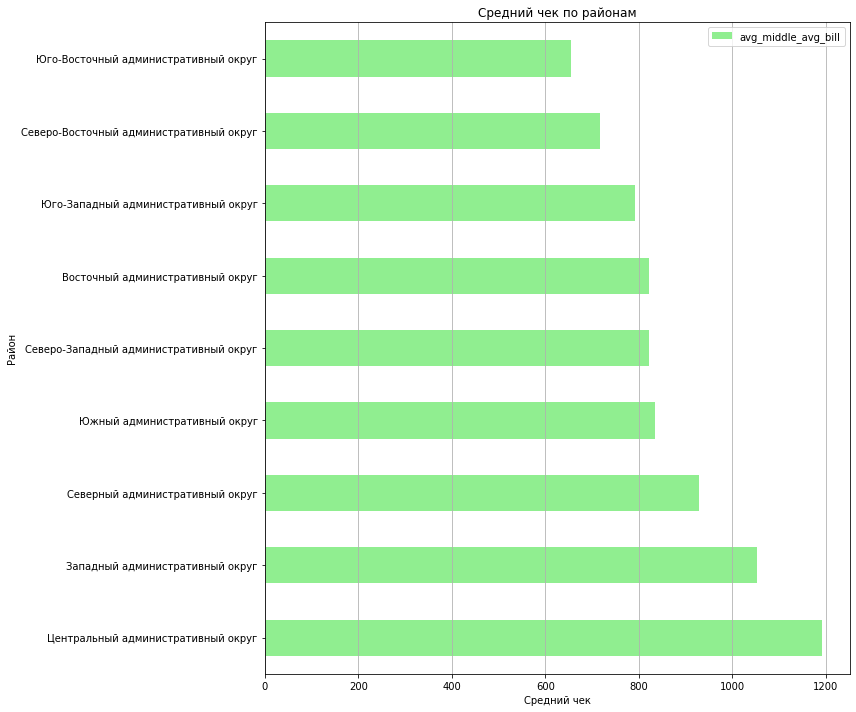

In [53]:
# Отфильтруем значения заглушки по middle_avg_bill и построим сводную таблицу с районами Москвы и средним чеком по middle_avg_bill
df_avg_bill = df[df['middle_avg_bill'] != -1]


district_table = pd.pivot_table(
    df_avg_bill,
    index='district', 
    values='middle_avg_bill',
    aggfunc={'middle_avg_bill': 'mean'}
).reset_index()

district_table.columns = ['district', 'avg_middle_avg_bill']

district_table['avg_middle_avg_bill'] = district_table['avg_middle_avg_bill'].round(2)
district_table_sort = district_table.sort_values(by='avg_middle_avg_bill', ascending=False)

print("Средний чек по районам")
print(district_table_sort)

district_table_sort.plot(
    kind='barh', 
    x='district', 
    y='avg_middle_avg_bill',
    color='lightgreen', 
    figsize=(12, 10))
plt.title('Средний чек по районам')
plt.xlabel('Средний чек')
plt.ylabel('Район')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Судя по диаграмме можно уверенно утверждать, что в центральном районе средний чек, а в последствии цены, выше всего. И чем дальше от центра, тем меньше будет средний чек и цены. В тройке лидеров Центральный административный округ(средний чек 1191.06), Западный административный округ(1053.23), Северный административный округ(927.96). А ниже всего средний чек в  Юго-Западном административном округе(792.56), Северо-Восточном административном округе(716.61), Юго-Восточном административном округе(654.10).

---


---

### Промежуточный вывод


Исходя из проведенного исследования можно сказать следующее. 
- Самыми популярными категориями заведений общественного питания являются кафе, ресторан и кофейня. заведения данных категорий занимают более половины всего количестве заведений в Москве.
- Больше всего заведений(2211) общественного питания в Центральном административном округе, в котром больше всего рапростанены рестораны(665), кафе(444) и кофейни(426).
- В Москве несетевых заведений(60,75% от общего числа заведений) больше чем сетевых(39,25% от общего числа заведений).
- В несетевых заведениях так же преобладают кафе(1292), рестораны(1257) и кофейни(684). Самыми непопулярными категориями заведений у несетевого общепита явялются булочные(95), столовые(221) и пиццерии(298).
- В сетевых заведениях картина аналогична несетевым. Лидерами являются кофейня(714), ресторан(712) и кафе(711). Меньше всего заведений в категориях столовая(85), булочная(154) и бар(159).
- В среднем посадочных мест больше всего в ресторанах(100), барах(95) и кофейнях(89).
- Средний рейтинг выше всего у баров(4,39), пиццерий(4,30) и ресторанов(4,30). Ниже всего у быстрого питания(4,06).
- Рейтинг коррелирует с прайсом. В среднем в завдениях с высоким прайсом средний рейтинг(4,44) выше чем в заведениях с выше среднего(4,4), средние(4,3) и низким(4,2). данный момент скорее всего связан с тем, что в заведениях с прайсом выше больше внимания уделяется меню, обстановке и сервису.
 -  В топ-15 сетей по количеству заведений входят шоколадница(119,средний рейтинг 4.178151), домино'с пицца(76, средний рейтинг 4.169737), додо пицца(74, средний рейтинг 4.286486), one price coffee(71, средний рейтинг 4.064789), яндекс лавка(68, средний рейтинг 3.870588), cofix(65, средний рейтинг 4.075385), prime(49, средний рейтинг 4.114286), кофепорт(42, средний рейтинг 4.147619), кулинарная лавка братьев караваевых(39, средний рейтинг 4.394872), теремок(36, средний рейтинг 4.105556), cofefest(31, средний рейтинг 3.977419), буханка(24, средний рейтинг 4.425000), drive cafё(24, средний рейтинг(4.025000),кофемания(22, средний рейтинг 4.463636), cinnabon(20, средний рейтинг 3.920000).
- Средний чек выше всего в Центральном административном округе(1190,56), а нижен всего в Юго-восточном административном округе.Чем дальше от центра, тем меньше средний чек.
 

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

#### Общий обзор проделанной работы

Общий обзор:

1. Для анализа были загружны данные датасетов `/datasets/rest_info.csv` и `/datasets/rest_price.csv`. Датасет rest_info.csv содержал 9 столбцов и 8406 строк, а rest_price.csv 5 столбцов и 4058 строк.

2. Датасеты `/datasets/rest_info.csv` и `/datasets/rest_price.csv` были объедены в один датасет `df`

3. Типы данных столбцов `category`, `district` и `price`  были преобразованы в тип category. `seats` преобразован в целочисленный тип данных, int32, `chain` в тип int8.

4. Пропуски:
  - `hours`: в 536 строках(6,37 % данных) отсутствует информация.
  - `seats`: в 3611 строках(43% данных) есть пропуски
  - `price`: в 5091 строке(60 % данных) пропущены данные.
  - `avg_bill`: в 4590 строках(54,6 % данных) данные отсуствуют.
  - `middle_avg_bill`: в 5257(62,6 % данных) есть пропуски.
  - `middle_coffee_cup`: в 7871 строке(93,6 % данных) отсутствует информация.
  
Данные пропуски не устранены, так как их устранение могло повлиять на корректность анализа данных.

5. Неявные и явные дубликаты:
  - в столбцах `name`, `adress` данные приведены к нижнему регистру и убраны лишние пробелы для устранения невявных дубликатов.
  - в комбинациях значений столбцов `name`, `adress` было найдено 4 неявных дубликата, которые были удалены.
  - столбцы `category`, `price`, `district`, `hours` так же прошли проверку на неявные дубликаты, которых обнаружено не было.
  - датасет был проверен на явные дубликаты. Явных дубликатов нет.

6. Исходный объеденнный дадасет содержал 8406 строк и 13 столбцов. После прохождения всех этапов предобработки, устранения пропусков и дубликатов, осталось 8402 строки. Так же был добавлен дополнительный столбец `is_24_7`, значение `True` котрого указывает на то, что заведение работает круглосуточно. Количество столбцов в преобработанном датасете - 14. Абсолютное количество удаленных строк равно 4, что является 5,05 % от исходного объема данных.

7. Был проведен исследовательский анализ:
   - Количество объектов общественного питания по `category`.
   - Распределение количества заведений по административным районам Москвы.
   - Распределение заведений каждой категории `category` в Центральном административном округе Москвы.
   - Cоотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения:
     - соотношение сетевых и несетевых заведений в целом по всем данным
     - какие категории заведений чаще являются не сетевыми
     - какие категории заведений чаще являются сетевыми
   - Типичное количество посадочных мест для каждой категории заведений.
   - Средний рейтинг по категориям заведений.
   - Корреляция рейтингов заведений.
   - Топ-15 популярных сетей в Москве.
   - Вариации среднего чека в зависимости от района Москвы

#### Главные выводы

1. Самыми популярными категориями заведений общественного питания являются кафе, ресторан и кофейня. заведения данных категорий занимают более половины всего количестве заведений в Москве.  

2. Больше всего заведений(2242) общественного питания в Центральном административном округе, в котром больше всего рапростанены рестораны(670), кафе(464) и кофейни(428).

3. В Москве несетевых заведений(61,9% от общего числа заведений) больше чем сетевых(38,1% от общего числа заведений).


4. с точки зрения распределния долей по категориям несетевых завдений, лидирующие позиции занимают бары(0,78),столовые(0,72) и кафе(0,67). Самыми меньшими долями обладают булочные(0,39), пиццерии(0,48) и кофейни(0,49).



5. В сетевых заведениях наблюдается абсолютно проивоположная картина. доли больше всего у булочных(0,61), пиццерий(0,52) икофеен(0,51). И меньше всего у баров(0,22), столовых(0,28) и кафе(0,33)



6. В среднем посадочных мест больше всего в ресторанах(114), барах(108,95) и кофейнях(100,43).


7. Средний рейтинг выше всего у баров(4,39), пиццерий(4,30) и ресторанов(4,30). Ниже всего у быстрого питания(4,06). 



8. Рейтинг коррелирует с прайсом. В среднем в завдениях с высоким прайсом средний рейтинг(4,43) выше чем в заведениях с выше среднего(4,38), средние(4,29) и низким(4,17). данный момент скорее всего связан с тем, что в заведениях с прайсом выше больше внимания уделяется меню, обстановке и сервису.



9. В топ-15 сетей по количеству заведений входят шоколадница(119), домино'с пицца(76), додо пицца(74), one price coffee(71), яндекс лавка(69), cofix(65), prime(49), кофепорт(42), кулинарная лавка братьев караваевых(39),теремок(36), cofefest(31), чайхана(26), буханка(25), drive café(24)б кофемания(22).
Сетевые бренды, такие как шоколадница, домино'с пицца и додо пицца, занимают лидирующие позиции по количеству заведений, но лидирующие позиции по рейтингам принадлежат кофемании, буханке и кулинарной лавке братьев караваевых. Что говорит о том, что количество не всегда равно качеству.



10. Средний чек выше всего в Центральном административном округе(1191,06), а ниже всего в Юго-восточном административном округе(654,1).Чем дальше от центра, тем меньше средний чек. Это связано с более высокой концентрацией дорогих заведений в центральном районе и преобладанием недорогих форматов (например, быстрое питание) на окраинах.

#### Рекомендации на основе анализа данных.

На основе анализа можно дать следующие рекомендации:

**Категория заведения**: кафе, рестораны и кофейни занимают больше половины рынка, что говорит о их популярности среди клиентов. Поэтому если заведение будет ориентировано на большую аудиторию, то лучше рассмотреть эти категории заведения.

**Местоположение**: в Центральном административном округе сконцентрировано больше всего заведений(2211) по сравнению с другими районами, что говорит о высокой концкуренции. Но в данном районе и самый высокий средний чек.
В остальных районах Москвы средний чек уменьшается по мере отдаления от центра, но при этом и снижается кокуренция. Поэтому если целью является заведение с высоким прайсом, то лучше рассмотреть именно ЦАО и категории заведений: рестораны, кафе и кофейни.

**Сетевое или несетевое заведение**: несетевые заведения занимают 61,9% рынка, сетевые 38,1. Так же стоит помнить, что у несетевых заведений самыми популярными котегориями являются бар, столовая, кафе и ресторан. У сетевых: булочная, пиццерия, кофейня и быстрое питание. Поэтому если целью является открытие уникального заведения, то стоит рассмотреть рассмотреть данный форматы несетевых заведений, если же нужен быстрый старт и узнаваемость, то рекомендуется рассмотреть Топ-15 сетевых заведений и популярные форматые у сетевиков. 

**Цена и рейтинг**: как показал анализ данных в большинстве случаев цена коррелирует с рейтингом. Высокий прайс равно высокий рейтинг, но только в случае если большое внимание уделяется качеству меню, обстановке и сервису. Но стоит помнить, что высокий прайс в таком формате работает только в определенных локациях, например в ЦАО. Поэтому если планируется высокобюджетный формат, то рекомендуется использовать именно высокий прайс, но с обязательным котролем высокого качества сервиса, меню и интерьера заведения.

**Посадочные места**: рестораны, бары и кофейни в среднем предлагают больше посдочных мест. Что может сыграть в пользу привлечения клиентов, особенно в Центральном административном округе. Если же целью является небольшое зведение, то рекмендуется рассмотреть открытие булочной. столовой или точки быстрого питания. 